### Effectively using Matplotlib with Pandas

![title](matplotlib-anatomy.png)

In [1]:
# data url
# https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# using local file
df = pd.read_excel("sample-salesv3.xlsx")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [12]:
# the total number of purchases and 
# total sales for the top 10 customers.
top_10 = (df.groupby('name')['ext price', 'quantity'].agg(
    {'ext price': 'sum', 'quantity': 'count'}).sort_values(
    by='ext price', ascending=False)
         )[:10].reset_index()

# rename columns for clarity during plots
top_10.rename(columns={'name': 'Name', 
                       'ext price': 'Sales', 
                       'quantity': 'Purchases'}, 
              inplace=True)

In [13]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


### matplotlib has many different styles available for rendering plots.

`plt.style.available` shows which ones are available on your system.


To use a style run `plt.style.use('ggplot')`

In [20]:
plt.style.use('seaborn')

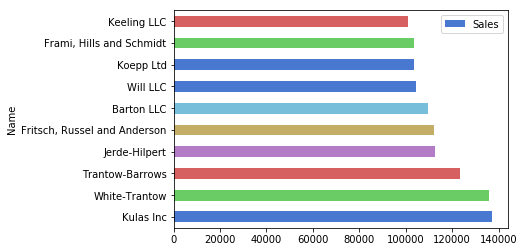

In [15]:
# plot the data using the standard pandas plotting function
top_10.plot.barh('Name', 'Sales')

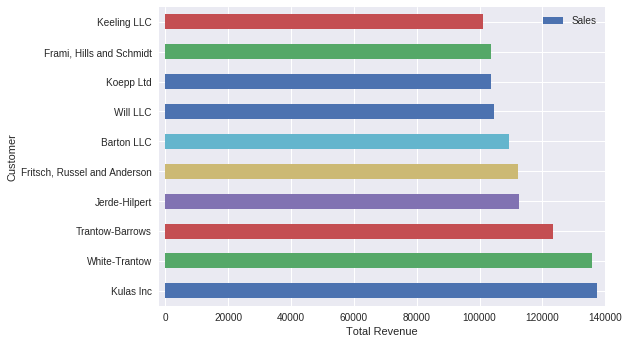

In [21]:
# using the matplotlib api to access the plot's attributes
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

# tweak the x limits and change some axis labels
ax.set_xlim([-2000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

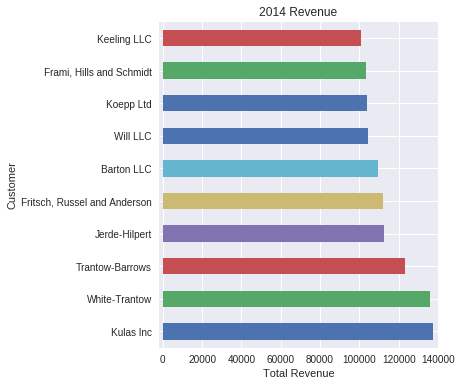

In [23]:
# using the matplotlib api to access the plot's attributes

# adjust the size of the figure
fig, ax = plt.subplots(figsize=(5, 6))

top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

# tweak the x limits 
ax.set_xlim([-2000, 140000])

# change axis labels & title
ax.set(title='2014 Revenue', 
       xlabel='Total Revenue', 
       ylabel='Customer')

# remove the legend
ax.legend().set_visible(False)

### Formatting xtick labels via `FuncFormatter`

- `FuncFormatter`, applies a user defined function to a value and  returns a nicely formatted string to place on the axis.

In [24]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

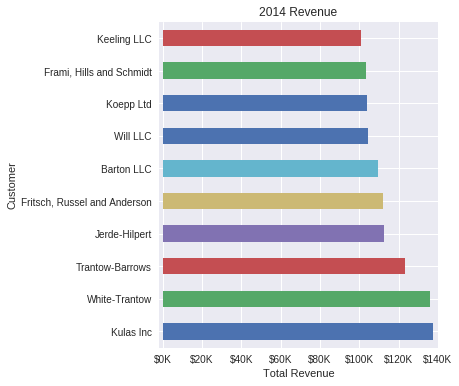

In [25]:
# using the matplotlib api to access the plot's attributes

# adjust the size of the figure
fig, ax = plt.subplots(figsize=(5, 6))

top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

# tweak the x limits 
ax.set_xlim([-2000, 140000])

# change axis labels & title
ax.set(title='2014 Revenue', 
       xlabel='Total Revenue', 
       ylabel='Customer')

# define the formatter function and apply it to the x axis
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# remove the legend
ax.legend().set_visible(False)

### Annotations to the plot

- to draw a horizontal/vertical line, you use `ax.axhline() / ax.axvline()` and to add custom text, you can use `ax.text()`


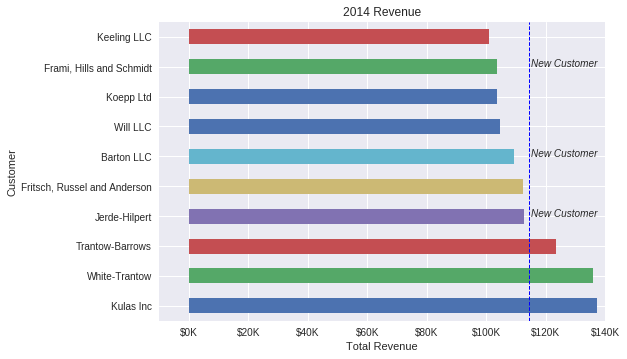

In [30]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer", fontstyle='italic')

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

### Multiple Plots

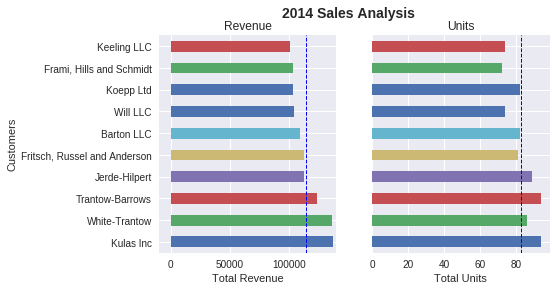

In [27]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2, 
                               sharey=True, 
                               figsize=(7, 4))

top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)

ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', 
        xlabel='Total Revenue', 
        ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, 
            color='b', 
            label='Average', 
            linestyle='--', 
            linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', 
        xlabel='Total Units', 
        ylabel='')
ax1.axvline(x=avg, 
            color='b', 
            label='Average', 
            linestyle='--', 
            linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', 
             fontsize=14, 
             fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

In [ ]:
# save the figure using multiple options :
# a png with opaque background ;specify dpi and 
# bbox_inches="tight" to minimize excess white space.

fig.savefig('sales.png', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

![title](matplotlib-pbpython-example.png)